In [1]:
%run -m celldom.nb.logging

In [2]:
import os
import os.path as osp
import matplotlib.pyplot as plt
from skimage import io
import numpy as np
import pandas as pd
from celldom.core import cytometry
from celldom.config import experiment_config
from celldom.dataset import marker_dataset
from celldom.extract import NO_IMAGES, ALL_IMAGES
import celldom
plt.gray()
None

In [3]:
config = experiment_config.ExperimentConfig(celldom.get_config('experiment', 'experiment_example_G3'))

In [4]:
config.field_names

['cohort', 'apartment', 'street', 'datetime', 'hours', 'condition']

In [5]:
config.path_regex

'.*Orange(?P<condition>[0-9]{1})_(?P<cohort>[a-zA-Z0-9_]{5})(?P<hours>[0-9]{3})hr/BFF_16X_St_(?P<street>[0-9]{3})_Apt_(?P<apartment>[0-9]{3})_(?P<datetime>[0-9]{12}).tif'

In [6]:
config.parse_path('20180614Orange1_0_1uM000hr/BFF_16X_St_000_Apt_006_201806142350.tif')

{'apartment': '006',
 'cohort': '0_1uM',
 'condition': '1',
 'datetime': Timestamp('2018-06-14 23:50:00'),
 'hours': '000',
 'street': '000'}

In [7]:
import imp
imp.reload(cytometry)

<module 'celldom.core.cytometry' from '/lab/repos/celldom/python/source/celldom/core/cytometry.py'>

In [8]:
cytometer = cytometry.Cytometer(config, '/tmp/test')

In [9]:
cytometer.initialize()

Using TensorFlow backend.


In [10]:
exp_dir = '20180614Orange1_0_1uM000hr'
path = osp.join(celldom.get_data_dir(), 'dataset', 'dataset04', exp_dir)
path

'/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr'

In [11]:
!find "$path" | head -n 20

/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr
/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_004_Apt_012_201806150026.tif
/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_004_Apt_012_201806202231.tif
/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_004_Apt_012_201806221816.tif
/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_010_Apt_003_201806152027.tif
/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_010_Apt_003_201806202230.tif
/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_010_Apt_003_201806221814.tif
/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_012_Apt_003_201806171415.tif
/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_014_Apt_012_201806142351.tif
/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_014_Apt_012_201806151139.tif
/lab/data/

In [12]:
img_path = osp.join(path, 'BFF_16X_St_004_Apt_012_201806221816.tif')
img_path

'/lab/data/celldom/dataset/dataset04/20180614Orange1_0_1uM000hr/BFF_16X_St_004_Apt_012_201806221816.tif'

In [13]:
img_raw = io.imread(img_path)
img_raw.dtype, img_raw.shape

(dtype('uint8'), (1200, 1600))

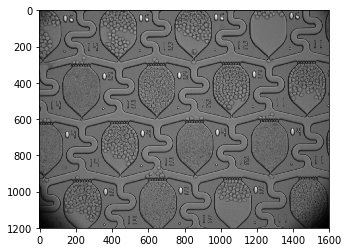

In [14]:
plt.imshow(img_raw)

In [15]:
acq = cytometry.Acquisition(config, img_path)

In [16]:
img = acq.load_image()
img.dtype, img.shape

(dtype('uint8'), (750, 1000, 3))

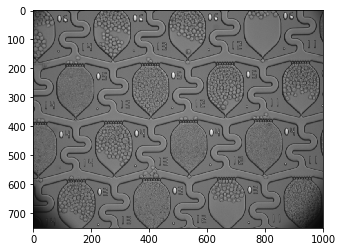

In [17]:
plt.imshow(img)

In [18]:
%pdb ON
acq_data, apt_data, cell_data = cytometer.analyze(acq, dpf=ALL_IMAGES)

Automatic pdb calling has been turned ON


In [19]:
cytometer.save(acq_data, apt_data, cell_data)

In [20]:
cytometer.datastore.store.flush()

In [21]:
acq_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 15 columns):
acq_apartment             1 non-null object
acq_cohort                1 non-null object
acq_condition             1 non-null object
acq_datetime              1 non-null datetime64[ns]
acq_hours                 1 non-null object
acq_id                    1 non-null object
acq_processed_at          1 non-null datetime64[ns]
acq_street                1 non-null object
apt_count                 1 non-null int64
raw_image_path            1 non-null object
raw_image_shape_height    1 non-null int64
raw_image_shape_width     1 non-null int64
raw_norm_image            1 non-null object
rotation                  1 non-null float64
scale                     1 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(3), object(8)
memory usage: 200.0+ bytes


In [22]:
apt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 39 columns):
acq_apartment             6 non-null object
acq_cohort                6 non-null object
acq_condition             6 non-null object
acq_datetime              6 non-null datetime64[ns]
acq_hours                 6 non-null object
acq_id                    6 non-null object
acq_processed_at          6 non-null datetime64[ns]
acq_street                6 non-null object
apt_id                    6 non-null int64
apt_image                 6 non-null object
apt_image_height          6 non-null int64
apt_image_width           6 non-null int64
apt_num                   6 non-null object
apt_num_digit_images      6 non-null object
apt_num_digit_scores      6 non-null object
apt_num_image             6 non-null object
cell_area_mean            6 non-null float64
cell_area_p10             6 non-null float64
cell_area_p50             6 non-null float64
cell_area_p90             6 non-null float64
ce

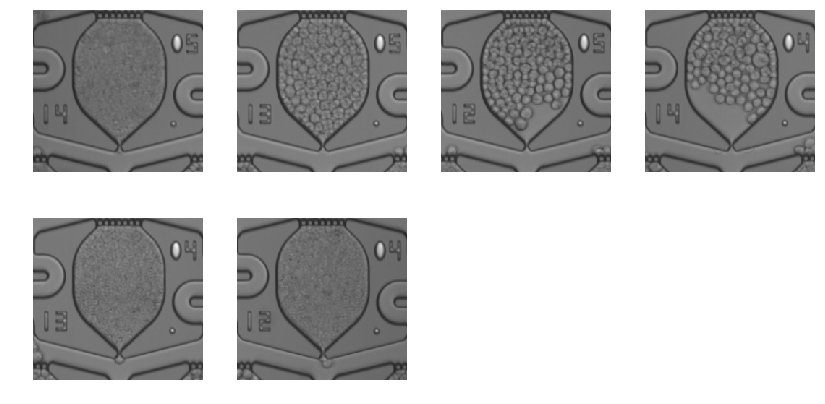

In [23]:
from cvutils.visualize import display_images
display_images(apt_data['apt_image'])

In [24]:
apt_data[['apt_num','st_num','cell_count']]

,apt_num,st_num,cell_count
0,05,14,128
1,05,13,155
2,05,12,131
3,04,14,106
4,04,13,149
5,04,12,146


In [25]:
cell_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 0 to 145
Data columns (total 24 columns):
acq_apartment       815 non-null object
acq_cohort          815 non-null object
acq_condition       815 non-null object
acq_datetime        815 non-null datetime64[ns]
acq_hours           815 non-null object
acq_id              815 non-null object
acq_processed_at    815 non-null datetime64[ns]
acq_street          815 non-null object
apt_id              815 non-null int64
apt_num             815 non-null object
area                815 non-null int64
cell_image          815 non-null object
centroid_x          815 non-null float64
centroid_y          815 non-null float64
eccentricity        815 non-null float64
in_chamber          815 non-null bool
in_trap             815 non-null bool
roi_xmax            815 non-null int64
roi_xmin            815 non-null int64
roi_ymax            815 non-null int64
roi_ymin            815 non-null int64
score               815 non-null float64
solid

In [26]:
cell_data.groupby(['in_chamber', 'in_trap']).size()

in_chamber  in_trap
False       True         4
True        False      811
dtype: int64